# **EDA Conclusions**

> The project :
- The objective is to create an application to detect customers clusters

> Global shape analysis conclusions :

- The dataframe is composed by :
    - 200 rows
    - 5 columns
- There is 1 categorical columns and 4 numeric columns
- There is 0 missing value !
- The columns [CustomerID] is useless, so we will drop it.

> Foundamental analysis :

- categorical feature analysis :
    - There is a litle bit more female customers but it's not a real problem (56% vs 44%)
    
- numeric features analysis :
    - Age : In general, the studied population is relativly young :
        * 75% of the customers selected in this sample are between 20 and 50 years old
        * The most customers have between 30 and 35 years olds approximativly

    - Annual income :
        * 75% of the customers earn 78k $ or less, in a year
        * The anual income average is 62k $
        * The studied population have a good purchasing power in general

    - Spending : we have all profiles of customers 
        * The values are approximatilvly perfectly distributed !

> Detailed correlation analysis :

- Categorical feature / Numerical features correlation :
    * The gender doest not have any important impact. Women spend a little bit more than men but the differences is not so important.
    Fot this application I will probably remove the Gender columns because I think we don't need it to cluster people depending their consomations beahviors.

- Numerical features correlation :
    - Age/Annual Income :
        * The age does not really impact the annual incomes.

    - Age/Spending Score :
        * People who are less than 40 years old, spend more
        * People over 60 years old, have not more the 60 spending score

    - Annual Income/Spending Score :
        * people who earn approximativly between 40k $ and 70k $ a year have similar spending scores (40-60)
        * the rest of the population have less concentrated spending scores

================================================================================================================
================================================================================================================

# **Packages and modules import**

In [1]:
from modules.exploratory_data_analysis import *

# **Data import**

In [2]:
mall_custumers_df = pd.read_csv("data/Mall_Customers.csv")
mall_custumers_df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

# **Global dataframe shape analaysis**

### **Copy the original dataframe to avoid wrong manipulations**

In [3]:
df = mall_custumers_df.copy()
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

### **Dataframe shape and columns type**

In [4]:
get_data_set_shape(df)

Data set shape :
	> Rows count : 200
	> Columns count : 5

Data set types :
	> int64 --------------> 4
	> object -------------> 1


### **Missing values analysis**

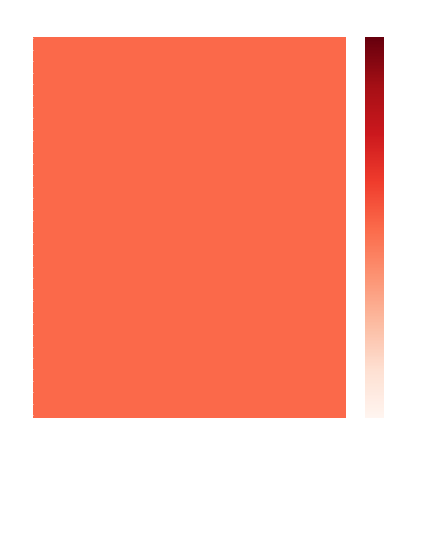

Missing values rate into the whole data set : 
	> 0.0 %

Missing values rate by column (columns with less than 90% missing values):

Useless columns (columns with more than 90% missing values):


In [5]:
nan_analysis(df)

# **Foundamental analysis**

### **Dataframe preparation** :

> Drop *[CustomerID]* column

In [6]:
df = df.drop(["CustomerID"], axis = 1)
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

### **Features analysis**

> Categorical feature composition

> Numerical fatures distribution

##### Categorical feature

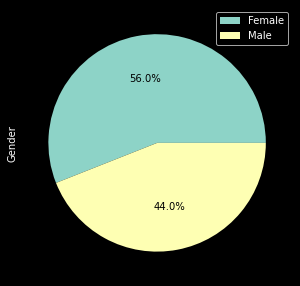

	> Unique values count =========================> 2
	> Unique values =========================> ['Male' 'Female']
	> Sample size =========================> 200


In [7]:
categorical_column_pie(df, "Gender")

##### Numerical features

=== > Age < ===


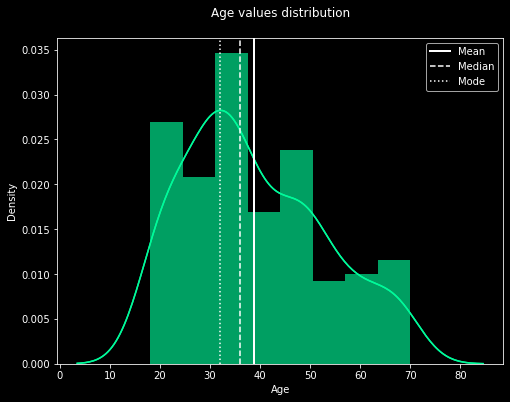

	> POSITIVE SKEW !


Count values  Min value  Max value  Mean  Q1  Median (Q2)  Q3  \
0           200         18         70    39  29           36  49   

   Standard deviation  
0                  14


#################################################################################

=== > Annual Income (k$) < ===


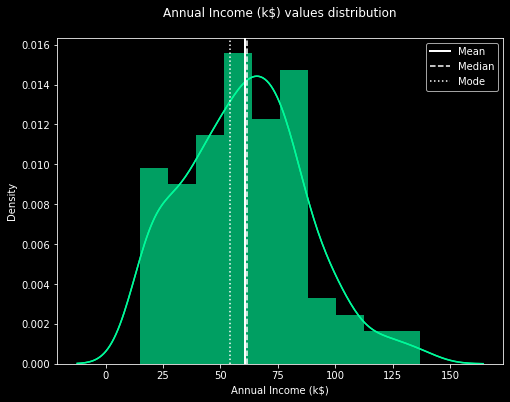

Count values  Min value  Max value  Mean  Q1  Median (Q2)  Q3  \
0           200         15        137    61  42           62  78   

   Standard deviation  
0                  26


#################################################################################

=== > Spending Score (1-100) < ===


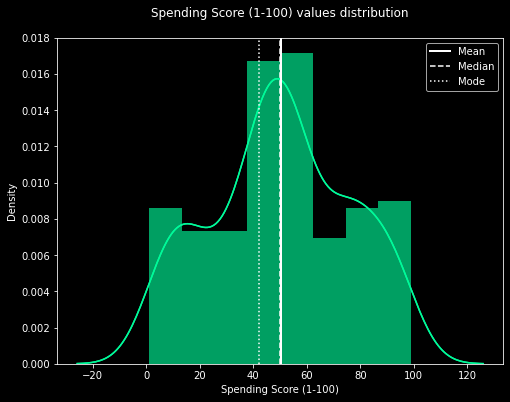

	> POSITIVE SKEW !


Count values  Min value  Max value  Mean  Q1  Median (Q2)  Q3  \
0           200          1         99    50  35           50  73   

   Standard deviation  
0                  26

In [8]:
for i in df.select_dtypes("int64") :
    print(f"=== > {i} < ===")
    numerical_column_distribution(df, i)
    if i != df.select_dtypes("int64").columns[-1]:
        print("\n#################################################################################\n")

### **Detailed correlation analysis**

> Categorical feature / Numerical features correlation
* [Gender] / [Age] distribution
* [Gender] / [Annual Income (k$)] distribution
* [Gender] / [Spending Score (1-100)] distribution

> Numerical features / Numerical features correlation
* [Age" , Annual Income (k$) , Spending Score (1-100)] pairplot
* [Age] / [Annual Income (k$)] lmplot
* [Age] / [Spending Score (1-100)] lmplot

##### Categorical feature / Numerical fatures correlation

=== > Gender/Age correlation < ===


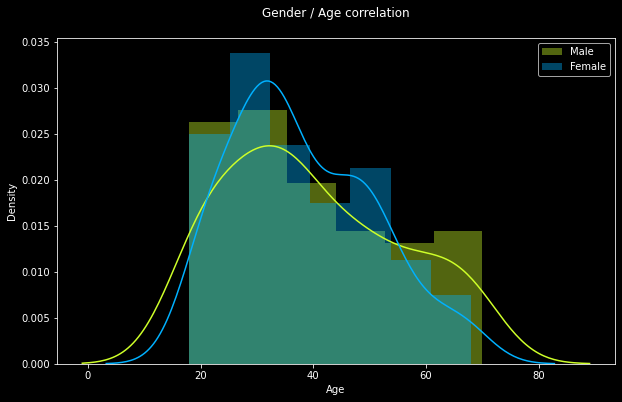


######################################################################

=== > Gender/Annual Income (k$) correlation < ===


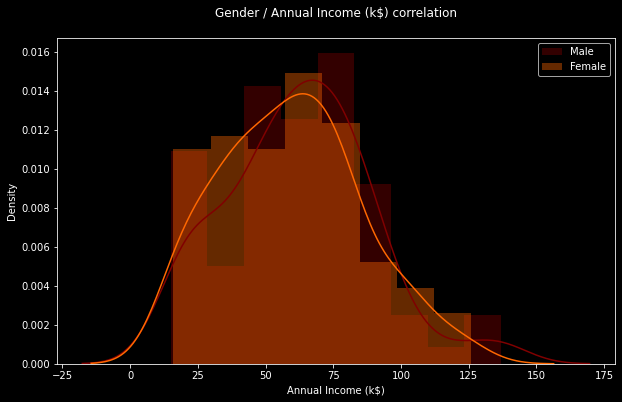


######################################################################

=== > Gender/Spending Score (1-100) correlation < ===


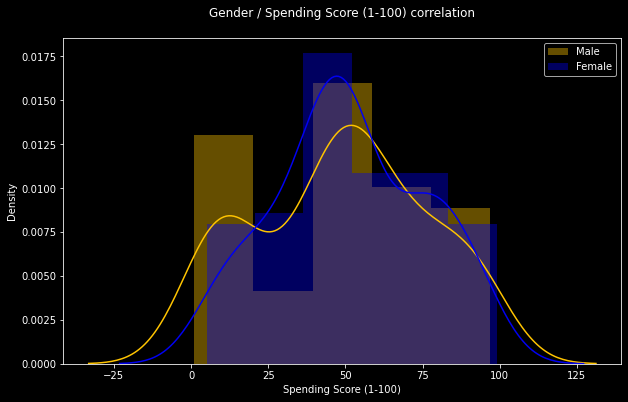

In [9]:
for i in df.select_dtypes("int64") :
    print(f"=== > Gender/{i} correlation < ===")
    numerical_X_distribution_depending_on_categorical_Y(df,i,"Gender")
    if i != df.select_dtypes("int64").columns[-1]:
        print("\n######################################################################\n")

#### Numerical features inter correlation

=== > Age/Annual Income (k$) correlation < ===


<Figure size 1080x720 with 0 Axes>

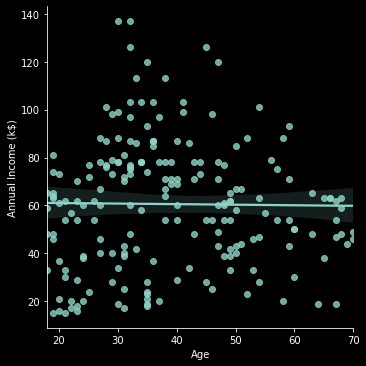


######################################################################

=== > Age/Spending Score (1-100) correlation < ===


<Figure size 1080x720 with 0 Axes>

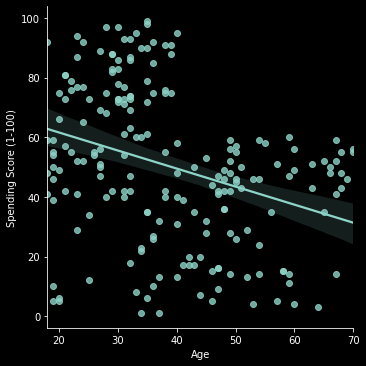


######################################################################

=== > Annual Income/Spending Score correlation < ===


<Figure size 1080x720 with 0 Axes>

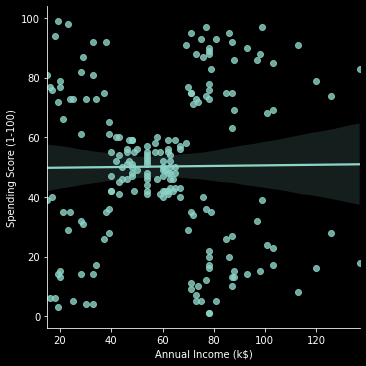

In [10]:
for i in ["Annual Income (k$)", "Spending Score (1-100)"] :
    print(f"=== > Age/{i} correlation < ===")
    numerical_X_numerical_Y_linear_correlation(df, "Age", i)
    print("\n######################################################################\n")

print(f"=== > Annual Income/Spending Score correlation < ===")
numerical_X_numerical_Y_linear_correlation(df, "Annual Income (k$)", "Spending Score (1-100)")

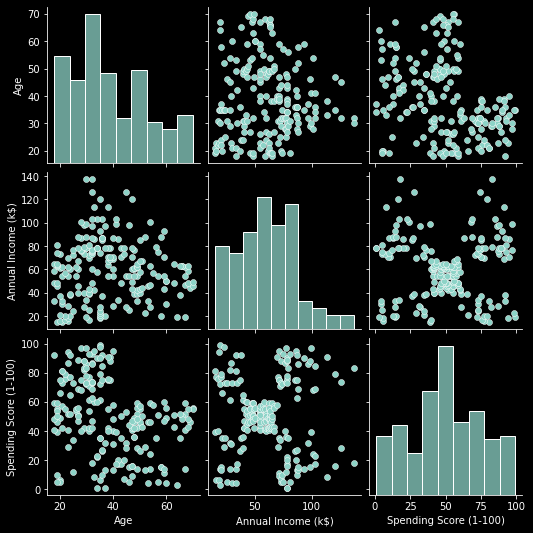

In [11]:
numerical_features_inter_correlation(df)

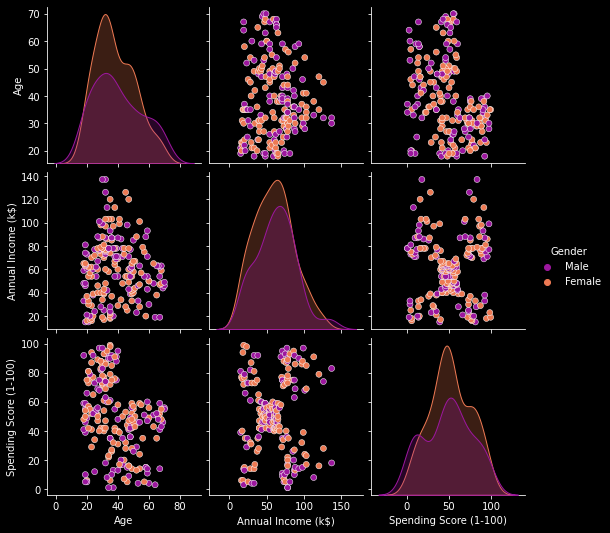

In [12]:
numerical_features_inter_correlation(df, categorical_target = "Gender")